In [1]:
! pip install pandas

In [2]:
import pandas as pd

### Merging 12 months of sales data into a single file

In [3]:
from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display

@register_cell_magic
def bgc(color, cell=None):
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

In [4]:
import os

# Specify the directory containing your CSV files
directory = 'Sales_Data/'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

csv_files


['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'merged_file.csv']

In [5]:

# Read each CSV file and concatenate them into a single DataFrame
dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
merged_df = pd.concat(dfs, ignore_index=True)

# Export the merged DataFrame to a CSV file
merged_df.to_csv(directory+'merged_file.csv', index=False)
print(merged_df)

       Order ID                 Product Quantity Ordered Price Each  \
0        295665      Macbook Pro Laptop                1       1700   
1        295666      LG Washing Machine                1      600.0   
2        295667    USB-C Charging Cable                1      11.95   
3        295668        27in FHD Monitor                1     149.99   
4        295669    USB-C Charging Cable                1      11.95   
...         ...                     ...              ...        ...   
373695   222905  AAA Batteries (4-pack)                1       2.99   
373696   222906        27in FHD Monitor                1     149.99   
373697   222907    USB-C Charging Cable                1      11.95   
373698   222908    USB-C Charging Cable                1      11.95   
373699   222909  AAA Batteries (4-pack)                1       2.99   

            Order Date                        Purchase Address  
0       12/30/19 00:01  136 Church St, New York City, NY 10001  
1       12/29/19 

In [6]:
dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
type([x for x in dfs])

list

In [7]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
373695,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
373696,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
373697,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
373698,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
#[x for x in merged_df if x['Order ID'] == 176558]
merged_df[merged_df['Order ID'] == '295665']

print(merged_df['Order ID'].dtypes)

object


##### Q1 What was the best month for sales? How much was earned that month?

In [9]:
#max(int(x) for x in merged_df['Order ID',skiprows=1])
#merged_df['Order ID'] = pd.to_numeric(merged_df['Order ID'], errors='coerce')

#max_order_id_row = merged_df[merged_df['Price Each'] == merged_df['Order ID'].max()]

merged_df.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
373695,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
373696,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
373697,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
373698,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [10]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_7583/1338565842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')


In [11]:
merged_df['Month'] = merged_df['Order Date'].dt.to_period('M')


merged_df['Month']

0         2019-12
1         2019-12
2         2019-12
3         2019-12
4         2019-12
           ...   
373695    2019-06
373696    2019-06
373697    2019-06
373698    2019-06
373699    2019-06
Name: Month, Length: 373700, dtype: period[M]

In [12]:
merged_df['Brutto'] = pd.to_numeric(merged_df['Price Each'], errors='coerce') * pd.to_numeric(merged_df['Quantity Ordered'], errors='coerce')



In [13]:

monthly_sales = merged_df.groupby('Month')['Brutto'].sum()



print(monthly_sales.idxmax())


2019-12


In [14]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95
...,...,...,...,...,...,...,...,...
373695,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06,2.99
373696,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06,149.99
373697,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06,11.95
373698,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06,11.95


In [15]:
import matplotlib.pyplot as plt

# Convert index to datetime dtype
monthly_sales.index = monthly_sales.index.to_timestamp()




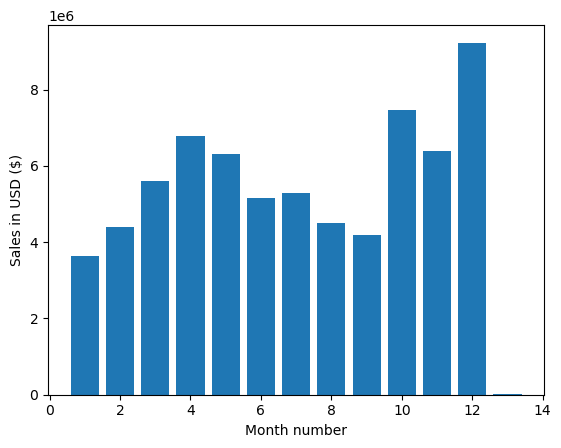

In [16]:
# Extracting data from the monthly_sales Series
months = monthly_sales.index
sales = monthly_sales.values

# Creating the bar chart
plt.bar(range(1,14), sales, width=0.8)  # Adjust the width parameter

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


##### Axis example:

In [17]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, None, 9]})
print(df)
print()
# Sum along axis=0 (rows)
sum_row = df.sum(axis=0)
print("Sum along rows (axis=0):\n", sum_row)

# Sum along axis=1 (columns)
sum_column = df.sum(axis=1)
print("\nSum along columns (axis=1):\n", sum_column)


print(df.isna().any(axis=1))

   A  B    C
0  1  4  7.0
1  2  5  NaN
2  3  6  9.0

Sum along rows (axis=0):
 A     6.0
B    15.0
C    16.0
dtype: float64

Sum along columns (axis=1):
 0    12.0
1     7.0
2    18.0
dtype: float64
0    False
1     True
2    False
dtype: bool


##### Cleaning up from the video:

In [18]:
len(merged_df)
#nan_df = merged_df[.any(axis)]

nan_df = merged_df[merged_df.isna().any(axis=1)]
display(nan_df.head())

merged_df=merged_df.dropna(how='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
254,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaT,NaN
264,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
648,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
680,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
705,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaT,NaN


##### Q2: What city had the highest number of sales

In [19]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95


In [20]:
! "C:\Users\zsombor.veres-lakos\AppData\Local\anaconda3\Scripts\pip.exe" install usaddress


zsh:1: command not found: C:\Users\zsombor.veres-lakos\AppData\Local\anaconda3\Scripts\pip.exe


In [21]:
! pip install random2

In [22]:
import random2


In [23]:
import usaddress

cities = usaddress.tag(merged_df['Purchase Address'].iloc[0])[0]['PlaceName']
test =merged_df.iloc[0:10]['Purchase Address'].apply(lambda x: usaddress.tag(x))
print(test.get(0))

merged_df['TEST2'] =merged_df['Purchase Address'].apply(lambda x: usaddress.tag(x)[0].get('PlaceName'))


(OrderedDict([('AddressNumber', '136'), ('StreetName', 'Church'), ('StreetNamePostType', 'St'), ('PlaceName', 'New York City'), ('StateName', 'NY'), ('ZipCode', '10001')]), 'Street Address')


/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_7583/1830585294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['TEST2'] =merged_df['Purchase Address'].apply(lambda x: usaddress.tag(x)[0].get('PlaceName'))


In [24]:
merged_df['City'] = merged_df['TEST2']

/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_7583/1894141480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['City'] = merged_df['TEST2']


In [25]:
merged_df['City']

0         New York City
1         New York City
2         New York City
3         San Francisco
4               Atlanta
              ...      
373695           Boston
373696    New York City
373697    San Francisco
373698    San Francisco
373699          Atlanta
Name: City, Length: 372610, dtype: object

In [26]:
groupBy = merged_df.groupby('City').sum('Brutto')

groupBy.loc[groupBy.idxmax()]


,Brutto
City,
San Francisco,16524407.82


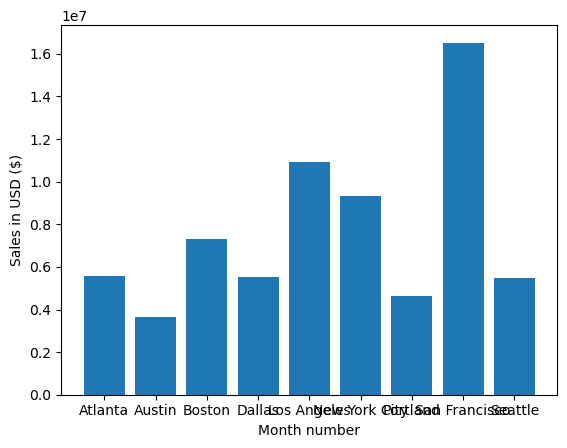

In [27]:
plt.bar(groupBy.index, groupBy.values.flatten(), width=0.8)  # Adjust the width parameter

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [28]:
# merged_df['Cities']

# filtered_df = merged_df[merged_df['Cities'] != 'New York City']
# filtered_df

In [29]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto,TEST2,City
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00,New York City,New York City
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00,New York City,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95,New York City,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99,San Francisco,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95,Atlanta,Atlanta


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [30]:
merged_df.loc[:, 'Order Date']  = pd.to_datetime(merged_df['Order Date'], errors='coerce')




In [31]:
merged_df['Order Date'].dt.time
merged_df.loc[:,'Hour'] = merged_df['Order Date'].dt.hour
merged_df.loc[:,'Minute'] = merged_df['Order Date'].dt.minute
merged_df.loc[:,'Second'] = merged_df['Order Date'].dt.second

/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_7583/2206114565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:,'Hour'] = merged_df['Order Date'].dt.hour
/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_7583/2206114565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:,'Minute'] = merged_df['Order Date'].dt.minute
/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_7583/2206114565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

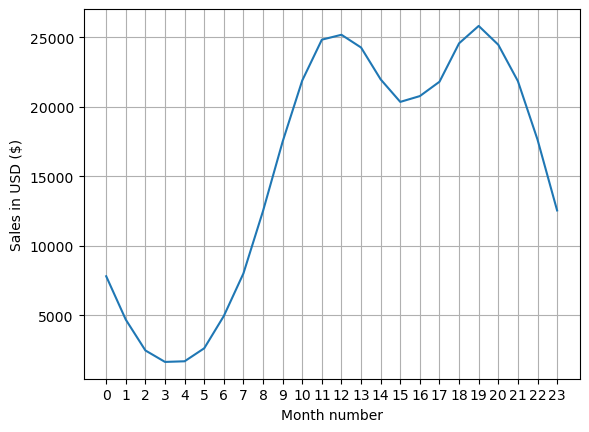

In [34]:
gb = merged_df.groupby(['Hour']).size()
gb

plt.plot(gb.index, gb.values.flatten())  # Adjust the width parameter

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(gb.index)
plt.grid()

plt.show()

In [33]:
import pandas as pd

# Example DataFrame
all_data = pd.DataFrame({
    'Hour': [9, 10, 9, 10, 11, 11, 12, 12],
    'Sales': [100, 200, 150, 180, 250, 300, 200, 220]
})
all_data
keys = [pair for pair, df in all_data.groupby(['Hour'])]

print(keys)
print(all_data.groupby(['Hour']).size())

[(9,), (10,), (11,), (12,)]
Hour
9     2
10    2
11    2
12    2
dtype: int64


#### Question 4: What products are most often sold together?

In [69]:

df = merged_df[merged_df['Order ID'].duplicated(keep=False)]

df['GroupedProducts'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

dfTemp = df[['GroupedProducts', 'Product']].drop_duplicates()
# testSet = {}

# groupByOrderId.apply(lambda x: x.values.most_values())

# type(groupByOrderId)


In [71]:
from itertools import combinations
from collections import Counter

count = Counter()

type(dfTemp['GroupedProducts'])

for item in dfTemp['GroupedProducts']:
    elements = item.split(',')
    count.update([(x, y) for x, y in combinations(elements, 2) if x != y])


sorted_list = sorted(count.most_common(10), key=lambda x: x[1])

sorted_list


[(('iPhone', 'Apple Airpods Headphones'), 71),
 (('Lightning Charging Cable', 'Wired Headphones'), 71),
 (('USB-C Charging Cable', 'Google Phone'), 72),
 (('Google Phone', 'Bose SoundSport Headphones'), 77),
 (('Wired Headphones', 'USB-C Charging Cable'), 77),
 (('iPhone', 'Wired Headphones'), 93),
 (('USB-C Charging Cable', 'Wired Headphones'), 135),
 (('Google Phone', 'Wired Headphones'), 145),
 (('iPhone', 'Lightning Charging Cable'), 178),
 (('Google Phone', 'USB-C Charging Cable'), 200)]

#### What product sold the most? Why do you think it sold the most?